<a href="https://colab.research.google.com/github/BSpekter/Special-Public/blob/master/Copy_of_Fashion_MNIST_Bayburin_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets,transforms
from torch import nn, optim
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

Как говорил Лектор, наверное стоит внести ссылки на источники, ибо так не совсем научно. Постараемся так и сделать.



Большая благодарность чувствуется вот тут:

https://towardsdatascience.com/building-neural-network-using-pytorch-84f6e75f9a

https://towardsdatascience.com/training-a-neural-network-using-pytorch-72ab708da210

Часть кода реализовано от этого источника 
https: //www.arunprakash.org/2018/12/cnn-fashion-mnist-dataset-pytorch.html

Вдохновение пару раз посещало и на этом сайте:
https://www.kaggle.com/swapnil2195/part-4-fashion-mnist-solution/data

Красивый код временами созерцался тут: https://necromuralist.github.io/In-Too-Deep/posts/nano/pytorch/part-4-fashion/

Вот это точно можно потом посмотреть: https://github.com/mayurbhangale/fashion-mnist-pytorch/blob/master/CNN_Fashion_MNIST.ipynb

CNN ресурс тут: https://github.com/kishankg/2-Layer-CNN-with-Pytorch-Fashion-MNIST-/blob/master/2%20Layer%20CNN%20with%20Pytorch%20(Fashion-MNIST).ipynb

In [0]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

In [7]:
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = True, transform=transform, download=True)

32768it [00:00, 39775.62it/s]                           
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


4423680it [00:02, 1699959.32it/s]                            
0it [00:00, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


8192it [00:00, 15108.15it/s]            

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


In [0]:
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=128)

In [0]:
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', train = False, transform=transform, download = True)

In [0]:
testloader = torch.utils.data.DataLoader(testset, shuffle=False, batch_size=128)

Попробовал поиграть с обычной полносвязной нейросетью. Конечно не 92% Accuracy, но тоже ничего. И конечно стоит сказать что Dropout помогает.

Да и попробовал применить Adam and SGD.

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
    def forward(self,x):
        #So here we are trying to flatten images along vector
        x = x.view(x.shape[0],-1)

        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

In [0]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model=Model().to(device)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [13]:
epoch = 30
train_losses, test_losses = [],[]
for e in range(epoch):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                images, labels = images.to(device), labels.to(device)

                log_ps = model(images)
                prob = torch.exp(log_ps)
                top_probs, top_classes = prob.topk(1, dim=1)
                equals = labels == top_classes.view(labels.shape)
                accuracy += equals.type(torch.FloatTensor).mean()
                test_loss += criterion(log_ps, labels)
        model.train()
    print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

Epoch: 1/30..  Training Loss: 2.266..  Test Loss: 2.207..  Test Accuracy: 0.413
Epoch: 2/30..  Training Loss: 2.030..  Test Loss: 1.741..  Test Accuracy: 0.382
Epoch: 3/30..  Training Loss: 1.407..  Test Loss: 1.163..  Test Accuracy: 0.617
Epoch: 4/30..  Training Loss: 1.029..  Test Loss: 0.939..  Test Accuracy: 0.689
Epoch: 5/30..  Training Loss: 0.866..  Test Loss: 0.820..  Test Accuracy: 0.719
Epoch: 6/30..  Training Loss: 0.771..  Test Loss: 0.748..  Test Accuracy: 0.736
Epoch: 7/30..  Training Loss: 0.712..  Test Loss: 0.703..  Test Accuracy: 0.744
Epoch: 8/30..  Training Loss: 0.673..  Test Loss: 0.672..  Test Accuracy: 0.757
Epoch: 9/30..  Training Loss: 0.643..  Test Loss: 0.645..  Test Accuracy: 0.766
Epoch: 10/30..  Training Loss: 0.620..  Test Loss: 0.625..  Test Accuracy: 0.774
Epoch: 11/30..  Training Loss: 0.599..  Test Loss: 0.607..  Test Accuracy: 0.779
Epoch: 12/30..  Training Loss: 0.582..  Test Loss: 0.590..  Test Accuracy: 0.787
Epoch: 13/30..  Training Loss: 0.566.

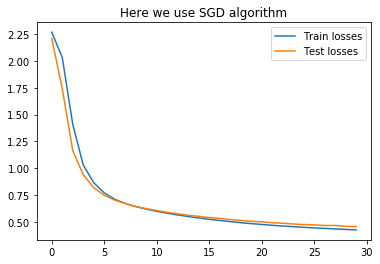

In [14]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.title("Here we use SGD algorithm")
plt.legend()

In [0]:
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [16]:
epoch = 30
train_losses, test_losses = [],[]
for e in range(epoch):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                images, labels = images.to(device), labels.to(device)

                log_ps = model(images)
                prob = torch.exp(log_ps)
                top_probs, top_classes = prob.topk(1, dim=1)
                equals = labels == top_classes.view(labels.shape)
                accuracy += equals.type(torch.FloatTensor).mean()
                test_loss += criterion(log_ps, labels)
        model.train()
    print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

Epoch: 1/30..  Training Loss: 0.513..  Test Loss: 0.414..  Test Accuracy: 0.851
Epoch: 2/30..  Training Loss: 0.382..  Test Loss: 0.410..  Test Accuracy: 0.857
Epoch: 3/30..  Training Loss: 0.344..  Test Loss: 0.382..  Test Accuracy: 0.866
Epoch: 4/30..  Training Loss: 0.323..  Test Loss: 0.372..  Test Accuracy: 0.864
Epoch: 5/30..  Training Loss: 0.309..  Test Loss: 0.371..  Test Accuracy: 0.865
Epoch: 6/30..  Training Loss: 0.293..  Test Loss: 0.356..  Test Accuracy: 0.875
Epoch: 7/30..  Training Loss: 0.281..  Test Loss: 0.350..  Test Accuracy: 0.873
Epoch: 8/30..  Training Loss: 0.272..  Test Loss: 0.364..  Test Accuracy: 0.873
Epoch: 9/30..  Training Loss: 0.263..  Test Loss: 0.356..  Test Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.251..  Test Loss: 0.350..  Test Accuracy: 0.879
Epoch: 11/30..  Training Loss: 0.245..  Test Loss: 0.344..  Test Accuracy: 0.878
Epoch: 12/30..  Training Loss: 0.241..  Test Loss: 0.378..  Test Accuracy: 0.884
Epoch: 13/30..  Training Loss: 0.233.

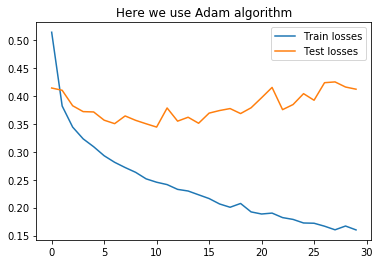

In [17]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.title("Here we use Adam algorithm")
plt.legend()

**Model with dropout**

In [0]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128,64)
        self.l4 = nn.Linear(64,10)
        
        self.dropout = nn.Dropout(p=0.2)
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        
        x = self.dropout(F.relu(self.l1(x)))
        x = self.dropout(F.relu(self.l2(x)))
        x = self.dropout(F.relu(self.l3(x)))
        x = F.log_softmax(self.l4(x), dim=1)
        return x

In [0]:
model = Model().to(device)
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [20]:
epoch = 30
train_losses, test_losses = [],[]
for e in range(epoch):
    train_loss = 0
    test_loss = 0
    accuracy = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        train_loss += loss.item()

        loss.backward()
        optimizer.step()
    else:
        with torch.no_grad():
            model.eval()
            for images,labels in testloader:
                images, labels = images.to(device), labels.to(device)

                log_ps = model(images)
                prob = torch.exp(log_ps)
                top_probs, top_classes = prob.topk(1, dim=1)
                equals = labels == top_classes.view(labels.shape)
                accuracy += equals.type(torch.FloatTensor).mean()
                test_loss += criterion(log_ps, labels)
        model.train()
    print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(train_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    train_losses.append(train_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

Epoch: 1/30..  Training Loss: 0.601..  Test Loss: 0.452..  Test Accuracy: 0.838
Epoch: 2/30..  Training Loss: 0.456..  Test Loss: 0.441..  Test Accuracy: 0.841
Epoch: 3/30..  Training Loss: 0.419..  Test Loss: 0.405..  Test Accuracy: 0.851
Epoch: 4/30..  Training Loss: 0.403..  Test Loss: 0.395..  Test Accuracy: 0.856
Epoch: 5/30..  Training Loss: 0.389..  Test Loss: 0.388..  Test Accuracy: 0.856
Epoch: 6/30..  Training Loss: 0.380..  Test Loss: 0.402..  Test Accuracy: 0.865
Epoch: 7/30..  Training Loss: 0.371..  Test Loss: 0.375..  Test Accuracy: 0.870
Epoch: 8/30..  Training Loss: 0.358..  Test Loss: 0.364..  Test Accuracy: 0.872
Epoch: 9/30..  Training Loss: 0.355..  Test Loss: 0.371..  Test Accuracy: 0.865
Epoch: 10/30..  Training Loss: 0.353..  Test Loss: 0.382..  Test Accuracy: 0.869
Epoch: 11/30..  Training Loss: 0.349..  Test Loss: 0.347..  Test Accuracy: 0.876
Epoch: 12/30..  Training Loss: 0.342..  Test Loss: 0.356..  Test Accuracy: 0.872
Epoch: 13/30..  Training Loss: 0.337.

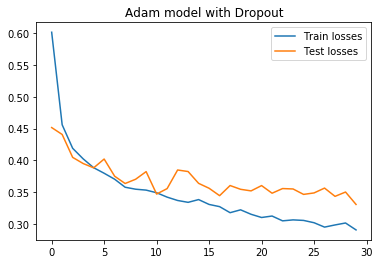

In [21]:
plt.plot(train_losses,label = "Train losses")
plt.plot(test_losses, label = "Test losses")
plt.title("Adam model with Dropout")
plt.legend()

Как видно, модель с Dropout ведёт себя лучше, пусть и не значительно.

Если я правильно понимаю, то дальше мы докажем что полносвязные сети проигрывают CNN в точности работы в задаче "классификации картинок".

**Попытаемся построить CNN**

In [0]:
num_epochs = 30
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [0]:
class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [0]:
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [0]:
def test_and_plot(model, num_epochs, criterion, optimizer):
    train_loss, test_loss = [], []
    for e in range(num_epochs):
        start_time = time.time()

        trloss = 0
        teloss = 0

        model.train(True)
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)
            #Run the model
            output = model(images)
            loss = criterion(output, labels)
            trloss += loss.item()

            #Backprop and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.train(False)
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            loss = criterion(output, labels)
            teloss += loss.item()

        train_loss.append(trloss/len(trainloader))
        test_loss.append(teloss/len(testloader))

        #Printing results for the epoch
        print("Epoch {} of {} took {:.3f}s".format(e+1, num_epochs,
                                                  time.time()-start_time))
        print("Training loss in this epoch: \t{:.6f}".format(train_loss[-1]))

    plt.plot(train_loss, label="Train loss")
    plt.plot(test_loss, label="Test loss")
    plt.legend()

In [0]:
def test_accuracy(model):
    model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            images = Variable(images.float())
            labels = Variable(labels)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model: {} %'.format(100 * correct / total))

Epoch 1 of 30 took 13.254s
Training loss in this epoch: 	0.519302
Epoch 2 of 30 took 13.308s
Training loss in this epoch: 	0.333599
Epoch 3 of 30 took 13.187s
Training loss in this epoch: 	0.288097
Epoch 4 of 30 took 13.320s
Training loss in this epoch: 	0.262649
Epoch 5 of 30 took 13.320s
Training loss in this epoch: 	0.241771
Epoch 6 of 30 took 13.323s
Training loss in this epoch: 	0.224542
Epoch 7 of 30 took 13.353s
Training loss in this epoch: 	0.211330
Epoch 8 of 30 took 13.181s
Training loss in this epoch: 	0.198282
Epoch 9 of 30 took 13.370s
Training loss in this epoch: 	0.188661
Epoch 10 of 30 took 13.265s
Training loss in this epoch: 	0.177885
Epoch 11 of 30 took 13.466s
Training loss in this epoch: 	0.168543
Epoch 12 of 30 took 13.203s
Training loss in this epoch: 	0.160433
Epoch 13 of 30 took 13.293s
Training loss in this epoch: 	0.152921
Epoch 14 of 30 took 13.335s
Training loss in this epoch: 	0.145281
Epoch 15 of 30 took 13.173s
Training loss in this epoch: 	0.139284
Epoc

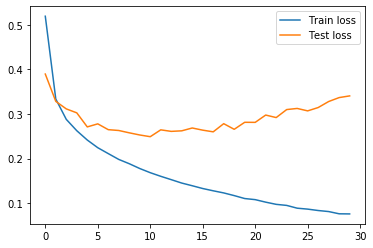

In [27]:
 test_and_plot(model, 30, criterion, optimizer)

In [28]:
test_accuracy(model)

Test Accuracy of the model: 91.22 %


Думаю тут можно сказать что lr для этой модели слишком высок.

Теперь попробуем модифицировать модель добавив Dropout и Batch normalization.

In [0]:
class CNN(nn.Module):
    def __init__(self,num_classes=10):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        self.Dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.Dropout(F.relu(self.fc(out)))
        return out
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()

In [0]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1 of 30 took 14.131s
Training loss in this epoch: 	1.538286
Epoch 2 of 30 took 14.096s
Training loss in this epoch: 	1.455303
Epoch 3 of 30 took 14.082s
Training loss in this epoch: 	1.432208
Epoch 4 of 30 took 14.243s
Training loss in this epoch: 	1.412555
Epoch 5 of 30 took 14.037s
Training loss in this epoch: 	1.397994
Epoch 6 of 30 took 14.228s
Training loss in this epoch: 	1.394849
Epoch 7 of 30 took 14.220s
Training loss in this epoch: 	1.381500
Epoch 8 of 30 took 14.341s
Training loss in this epoch: 	1.379545
Epoch 9 of 30 took 14.312s
Training loss in this epoch: 	1.370291
Epoch 10 of 30 took 14.473s
Training loss in this epoch: 	1.361275
Epoch 11 of 30 took 14.389s
Training loss in this epoch: 	1.354081
Epoch 12 of 30 took 14.300s
Training loss in this epoch: 	1.349702
Epoch 13 of 30 took 14.279s
Training loss in this epoch: 	1.344812
Epoch 14 of 30 took 14.319s
Training loss in this epoch: 	1.345227
Epoch 15 of 30 took 14.371s
Training loss in this epoch: 	1.336102
Epoc

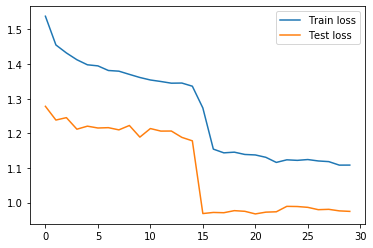

In [31]:
test_and_plot(model, 30, criterion, optimizer)

In [32]:
test_accuracy(model)

Test Accuracy of the model: 63.93 %


Решили проблему - потеряли Accuracy. Видимо в дальнейшем нужно просто модифицировать параметры.

В общем случае поняли что добавленные нами методы работают. Сейчас придумаем новую модель для достижения Accuracy > 92%.

Буду надеятся что ключ к упеху - Дропауты, Батчнорм и больше слоёв.

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            )
        self.layer2 = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.layer3 = nn.Sequential(
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.fc1 = nn.Linear(128*49, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

        self.LogSoftmax = nn.LogSoftmax( dim=1)

        self.Dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.Dropout(self.layer2(out))
        out = self.layer3(out)

        out = out.reshape(out.size(0), -1)

        out = F.relu(self.fc1(out))
        out = self.Dropout(self.fc2(out))
        out = self.LogSoftmax(self.fc3(out))
        return out
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1 of 30 took 16.113s
Training loss in this epoch: 	0.436789
Epoch 2 of 30 took 16.153s
Training loss in this epoch: 	0.267320
Epoch 3 of 30 took 16.078s
Training loss in this epoch: 	0.213580
Epoch 4 of 30 took 15.889s
Training loss in this epoch: 	0.186081
Epoch 5 of 30 took 16.017s
Training loss in this epoch: 	0.162760
Epoch 6 of 30 took 16.194s
Training loss in this epoch: 	0.143466
Epoch 7 of 30 took 15.976s
Training loss in this epoch: 	0.128201
Epoch 8 of 30 took 16.046s
Training loss in this epoch: 	0.111882
Epoch 9 of 30 took 16.223s
Training loss in this epoch: 	0.099924
Epoch 10 of 30 took 16.225s
Training loss in this epoch: 	0.092191
Epoch 11 of 30 took 16.252s
Training loss in this epoch: 	0.078689
Epoch 12 of 30 took 16.047s
Training loss in this epoch: 	0.071193
Epoch 13 of 30 took 16.240s
Training loss in this epoch: 	0.066709
Epoch 14 of 30 took 16.225s
Training loss in this epoch: 	0.060197
Epoch 15 of 30 took 16.244s
Training loss in this epoch: 	0.056958
Epoc

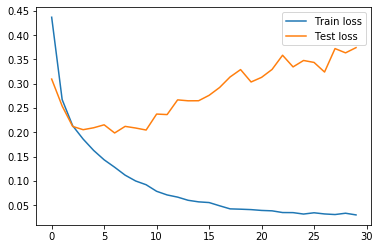

In [34]:
test_and_plot(model, 30, criterion, optimizer)

In [35]:
test_accuracy(model)

Test Accuracy of the model: 93.3 %


Цели по Accuracy достигли, попробуем сделать лучше.

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.BatchNorm2d(1),
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU()
            )
        self.layer2 = nn.Sequential(
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU()
            )
        self.layer3 = nn.Sequential(
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU()
            )
        self.layer4 = nn.Sequential(
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            )
        self.fc1 = nn.Linear(25088, 256)
        self.fc2 = nn.Linear(256, 10)

        self.LogSoftmax = nn.LogSoftmax(dim=1)
        self.Dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.Dropout(self.layer2(out))
        out = self.Dropout(self.layer3(out))
        out = self.Dropout(self.layer4(out))

        out = out.reshape(out.size(0), -1)

        out = F.relu(self.fc1(out))
        out = self.LogSoftmax(self.fc2(out))
        return out
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1 of 30 took 17.934s
Training loss in this epoch: 	0.559586
Epoch 2 of 30 took 17.878s
Training loss in this epoch: 	0.272470
Epoch 3 of 30 took 17.758s
Training loss in this epoch: 	0.220798
Epoch 4 of 30 took 17.706s
Training loss in this epoch: 	0.189712
Epoch 5 of 30 took 17.738s
Training loss in this epoch: 	0.163124
Epoch 6 of 30 took 17.759s
Training loss in this epoch: 	0.141003
Epoch 7 of 30 took 17.863s
Training loss in this epoch: 	0.124916
Epoch 8 of 30 took 17.726s
Training loss in this epoch: 	0.106520
Epoch 9 of 30 took 18.134s
Training loss in this epoch: 	0.095082
Epoch 10 of 30 took 17.811s
Training loss in this epoch: 	0.083453
Epoch 11 of 30 took 17.701s
Training loss in this epoch: 	0.074854
Epoch 12 of 30 took 17.939s
Training loss in this epoch: 	0.063972
Epoch 13 of 30 took 17.698s
Training loss in this epoch: 	0.057416
Epoch 14 of 30 took 17.657s
Training loss in this epoch: 	0.051176
Epoch 15 of 30 took 17.661s
Training loss in this epoch: 	0.051121
Epoc

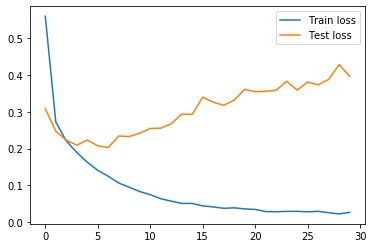

In [37]:
test_and_plot(model, 30, criterion, optimizer)

In [38]:
test_accuracy(model)

Test Accuracy of the model: 93.34 %


Получилось не сильно лучше.
Думаю в целом задание выполнено.